In [20]:
import acquire
import prepare
import explore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import explore
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
telco_df = acquire.get_telco_data()
telco_df = prepare.prep_telco_data(telco_df)
train, validate, test = prepare.train_validate_test_split(telco_df, 'churn_Yes')

There are no duplicate rows in your dataset.
Removing the following columns: ['customer_id']


In [16]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,has_phone_service,has_single_line,has_multiple_lines,online_security_No internet service,has_online_security,online_backup_No internet service,has_online_backup,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
5642,4,3,3,0,23,25.60,514.75,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0
3338,3,2,2,0,27,100.50,2673.45,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4273,1,2,1,1,7,89.15,574.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
2382,3,1,1,0,47,58.60,2723.40,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2655,4,2,3,0,41,99.65,4220.35,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


churn_Yes       0    1
pay_by_card           
0            2180  911
1             717  135


<AxesSubplot:xlabel='churn_Yes', ylabel='pay_by_card'>

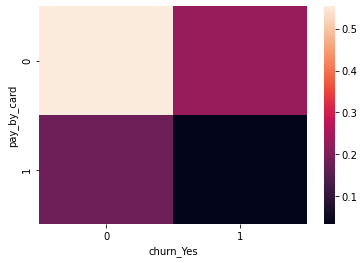

In [28]:
# categorical v categorical
# Matrix of counts or probabilities
print(pd.crosstab(train.pay_by_card, train.churn_Yes, margins=False))
crosstab = pd.crosstab(train.pay_by_card, train.churn_Yes, margins=False, normalize=True)
sns.heatmap(crosstab)

# very few customers pay by card
# customers who don't pay by card churn a lot more

churn_Yes       0    1
has_partner           
0            1382  662
1            1515  384


<AxesSubplot:xlabel='churn_Yes', ylabel='has_partner'>

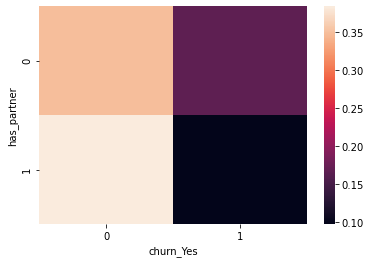

In [30]:
# categorical v categorical
# Matrix of counts or probabilities
print(pd.crosstab(train.has_partner, train.churn_Yes))
crosstab = pd.crosstab(train.has_partner, train.churn_Yes, normalize=True)
sns.heatmap(crosstab)

# more customers who don't churn with partners
# doesnt seem to be a huge difference 

churn_Yes            0     1   All
has_1yr_contract                  
0                 2174   962  3136
1                  723    84   807
All               2897  1046  3943


<AxesSubplot:xlabel='churn_Yes', ylabel='has_1yr_contract'>

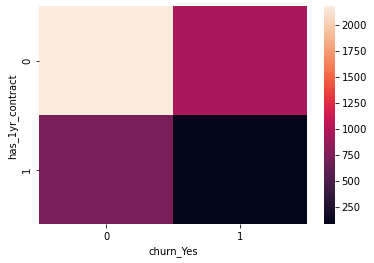

In [33]:
# categorical v categorical
# Matrix of counts or probabilities
print(pd.crosstab(train.has_1yr_contract, train.churn_Yes, margins=True))
crosstab = pd.crosstab(train.has_1yr_contract, train.churn_Yes)
sns.heatmap(crosstab)

# more churn in customers without a 1 yr contract
# a lot of customers do not have a 1 yr contract

In [171]:
# check which cols are numeric
numeric_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]
numeric_cols.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'tenure',
 'monthly_charges']

In [11]:
import pandas as pd
# check which columns are object type or categorical
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols
# obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]


Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [38]:
# # check different categories and proportions of each category for object type cols
# for col in obj_cols:
#     print(df[col].value_counts())
#     print('-------------------')
#     print('\n')
#     print(f'proportions of {col}')
#     print('')
#     print(df[col].value_counts(normalize=True,dropna=False))
#     print('-------------------')

In [39]:
# import matplotlib.pyplot as plt
# for col in numeric_cols:
#     plt.title(f'Distribution of {col}')
#     plt.hist(df[col])
#     plt.show()

In [40]:
# # check head and info functions and only describe numeric cols
# def observe_df(df):
#     print('Quick look at the Telco dataset')
#     print('')
#     print(f'The telco dataframe has\033[1m {df.shape[0]} rows and {df.shape[1]} columns \033[0m.')
#     print('')
#     print(f'There are total of {df.isna().sum().sum()} missing values in the entire dataframe.')
#     print('')
#     print('\033[1m Here are the first 5 rows of our dataset \033[0m')
#     print('')
#     print(df)
#     print('')
#     print(df.info())
#     print('')
#     print('\033[1m Here are the summary statistics of our dataset \033[0m')
#     print(df.describe())
#     # df.head(), df.info(), 
#     print (f'The values for each column')
    
    

In [41]:
# observe_df(df)

In [27]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [42]:
# # g = df.gender.value_counts()
# # plt.bar(x=df.gender, height=df.gender.value_counts())
# plt.hist(df.gender)

In [43]:
# data = df #{'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
# names = list(data.gender())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(names, values)
# axs[1].scatter(names, values)
# axs[2].plot(names, values)
# fig.suptitle('Categorical Plotting')

In [44]:
# import seaborn as sns
# # feature= [obj_cols]
# sns.barplot(x=df.gender, data = df)
# # sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])

In [45]:
    
# def plot_bar(df, col):    
#     print('Bar Plot of ' + col)
#     plt.hist(df[col])
#     plt.show()

In [46]:
# plot_bar(df, df.multiple_lines)

In [101]:
df.total_charges[85]

' '

In [61]:
df[df.duplicated() == True]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [83]:
# df.contract_type.value_counts()
# telco_dummies = pd.get_dummies(df.contract_type_id)

# telco_dummies = telco_dummies.rename(columns={1: "month_to_month_encoded", 2: "one_year_contract_encoded", 3: "two_year_contract_encoded"})

# telco_dummies.tail()

In [33]:
columns_to_drop = ['customer_id']
df = df.drop(columns=columns_to_drop)
df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
dummy_df=pd.get_dummies(df[['gender', 'partner', 'dependents','phone_service', 'multiple_lines',
                              'online_security','online_backup','device_protection','tech_support','streaming_tv',
                               'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, 
                        drop_first=[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True])

In [36]:
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0


In [37]:
dummy_df = dummy_df.rename(columns={'partner_Yes': 'has_partner', 'dependents_Yes': 'has_dependents', 'phone_service_Yes': 'has_phone_service',
                        'multiple_lines_No phone service': 'has_single_line', 'multiple_lines_Yes': 'has_multiple_lines', 
                         'online_security_Yes': 'has_online_security', 'online_backup_Yes': 'has_online_backup', 
                         'contract_type_One year': 'has_1yr_contract','contract_type_Two year': 'has_2yr_contract',
                         'internet_service_type_Fiber optic': 'has_fiber', 'internet_service_type_None': 'has_internet_service',
                         'payment_type_Credit card (automatic)': 'pay_by_card', 'payment_type_Electronic check':'pay_echeck',
                         'payment_type_Mailed check':'pay_mailcheck' 
                        })

In [38]:
df = pd.concat([df, dummy_df], axis=1)

In [39]:
cols_to_drop = ['gender', 'partner', 'dependents','phone_service', 'multiple_lines',
                              'online_security','online_backup','device_protection','tech_support','streaming_tv',
                               'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
df = df.drop(columns = cols_to_drop)

In [40]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,has_partner,has_dependents,has_phone_service,has_single_line,has_multiple_lines,online_security_No internet service,has_online_security,online_backup_No internet service,has_online_backup,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,has_1yr_contract,has_2yr_contract,has_fiber,has_internet_service,pay_by_card,pay_echeck,pay_mailcheck
0,2,1,3,0,65,90.45,5957.9,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1
1,4,1,3,0,54,45.20,2460.55,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,0,56,45.05,2560.1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1,3,0,20,39.40,825.4,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,3,1,3,0,72,85.15,6316.2,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0


In [53]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [53]:
df.tenure[df.total_charges == ' ']

85      0
156     0
236     0
255     0
339     0
5681    0
5717    0
5727    0
5798    0
6007    0
6257    0
Name: tenure, dtype: int64

In [ ]:
df = df[df.tenure != 0]

In [78]:
df.shape

(7032, 34)

In [80]:
df = df.drop_duplicates()

In [81]:
df.shape

(7010, 34)

In [62]:
df.total_charges.dtype

dtype('float64')

In [77]:
df.duplicated().sum()

22

In [136]:
cat_vars = ['gender', 'senior_citizen']
quant_vars = ['monthly_charges', 'total_charges']